Populating the interactive namespace from numpy and matplotlib


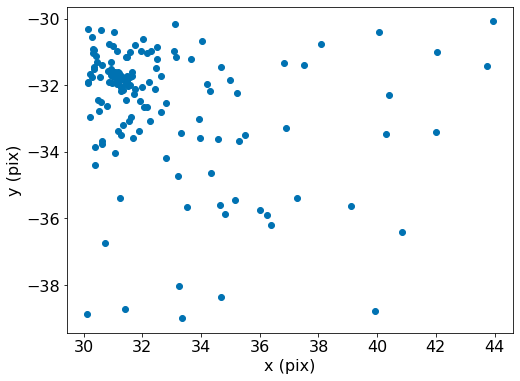

In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import os

from astropy.timeseries import LombScargle
from astropy.table import Table

# configure notebook for plotting
%pylab inline --no-import-all 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # allows access to colours
# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

ddir = 'Group7data/U07/Up/F06/' 

stars = Table.read(ddir+'points.txt',format='ascii')

plt.scatter(stars['x'],stars['y'])
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

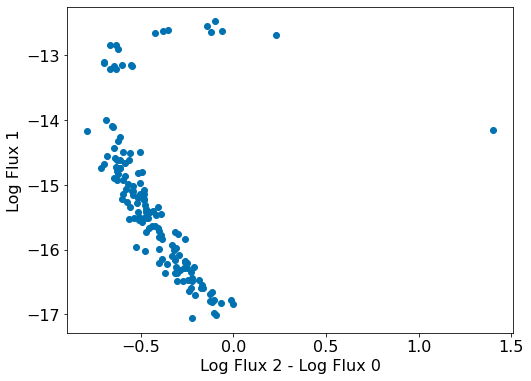

In [2]:
m0, m1, m2 = (np.log10(stars['flux1']), 
              np.log10(stars['flux2']), 
              np.log10(stars['flux3'])) 
colour = m2-m0

s = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

In [3]:
print('Parallaxes: mean %.3f, sd %.3f' % (np.mean(stars['par']),np.std(stars['par'])))

Parallaxes: mean 0.001, sd 0.001


Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

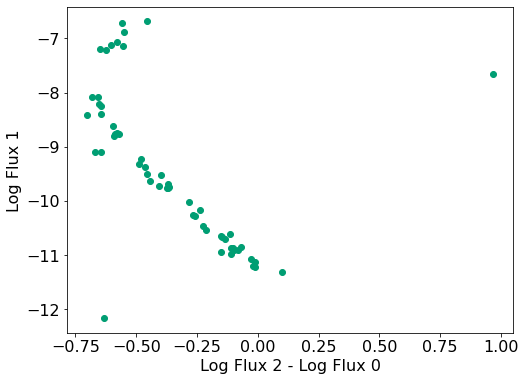

In [4]:
import glob # this package lets you search for filenames
import os

all_points = glob.glob('Group7data/U07/*/*/points.txt')

fig, ax1 = plt.subplots(1,1)
for j, point in enumerate(all_points):
    try:
        this = Table.read(point, format='ascii')
        
        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']),
                                  np.log10(this['flux2']),
                                  np.log10(this['flux3']))
        thiscolour = thism2 - thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar > 0.05
        ax1.scatter(thiscolour[mm], abs_mag[mm], color=colours[1])
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

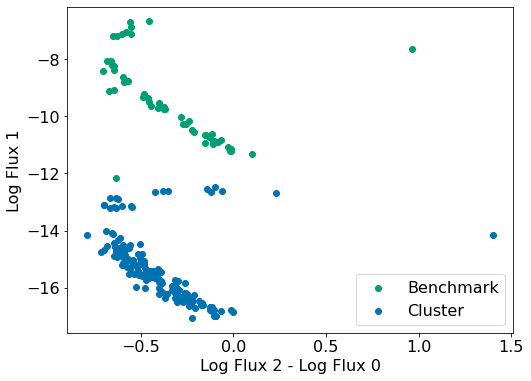

In [5]:
fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point, format='ascii')
        
        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']),
                                  np.log10(this['flux2']),
                                  np.log10(this['flux3']))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.05
        
        h = plt.scatter(thiscolour[mm], abs_mag[mm],color=colours[1])
    except:
        pass
    
s = plt.scatter(colour, m1, color=colours[0])

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

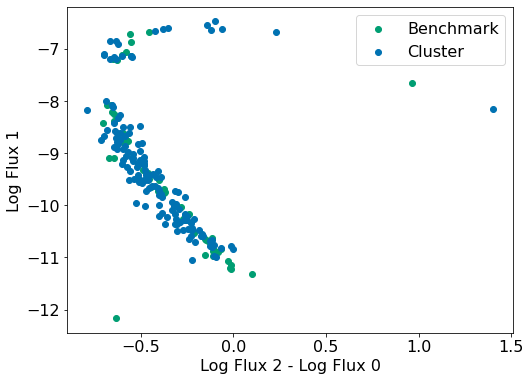

In [7]:
fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point, format='ascii')
        
        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']),
                                  np.log10(this['flux2']),
                                  np.log10(this['flux3']))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.05
        
        h = plt.scatter(thiscolour[mm], abs_mag[mm],color=colours[1])
    except:
        pass
    
s = plt.scatter(colour, m1+6.0, color=colours[0])

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

In [ ]:
#The fitted HR diagram gives an offset of about 6. 
# Now using the inverse square law, and standardizing everything to a brightness at one parsec.
# This is 2*log10(distance) so this cluster is at an approximate distance of 10^(3) = 1000 pc.